<a href="https://colab.research.google.com/github/Saba-a11/Crypto/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data  sp500_close.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sp500_close.csv", index_col=0, parse_dates=True)
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [6]:
df[["GOOG"]]

,GOOG
2013-02-08,NaN
2013-02-09,NaN
2013-02-10,NaN
2013-02-11,NaN
2013-02-12,NaN
...,...
2018-02-03,NaN
2018-02-04,NaN
2018-02-05,1055.80
2018-02-06,1080.60


In [7]:
google = df[["GOOG"]].copy().dropna()
google

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00
...,...
2018-02-01,1167.70
2018-02-02,1111.90
2018-02-05,1055.80
2018-02-06,1080.60


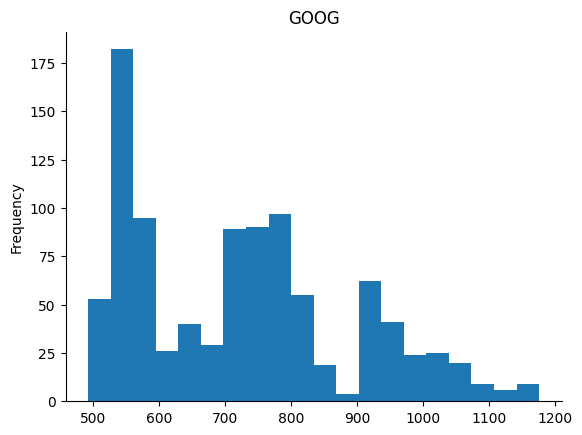

In [8]:
# @title GOOG

from matplotlib import pyplot as plt
google['GOOG'].plot(kind='hist', bins=20, title='GOOG')
plt.gca().spines[['top', 'right',]].set_visible(False)

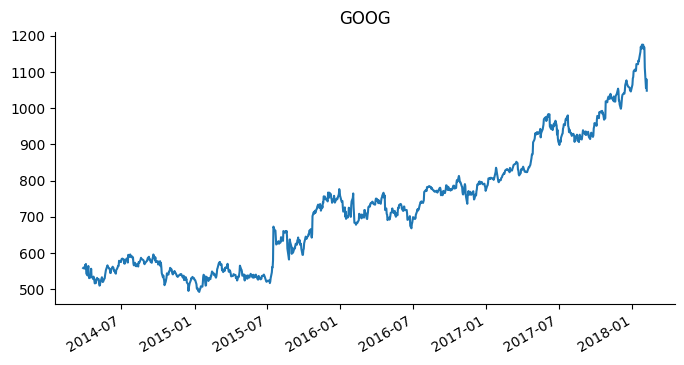

In [9]:
# @title GOOG

from matplotlib import pyplot as plt
google['GOOG'].plot(kind='line', figsize=(8, 4), title='GOOG')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

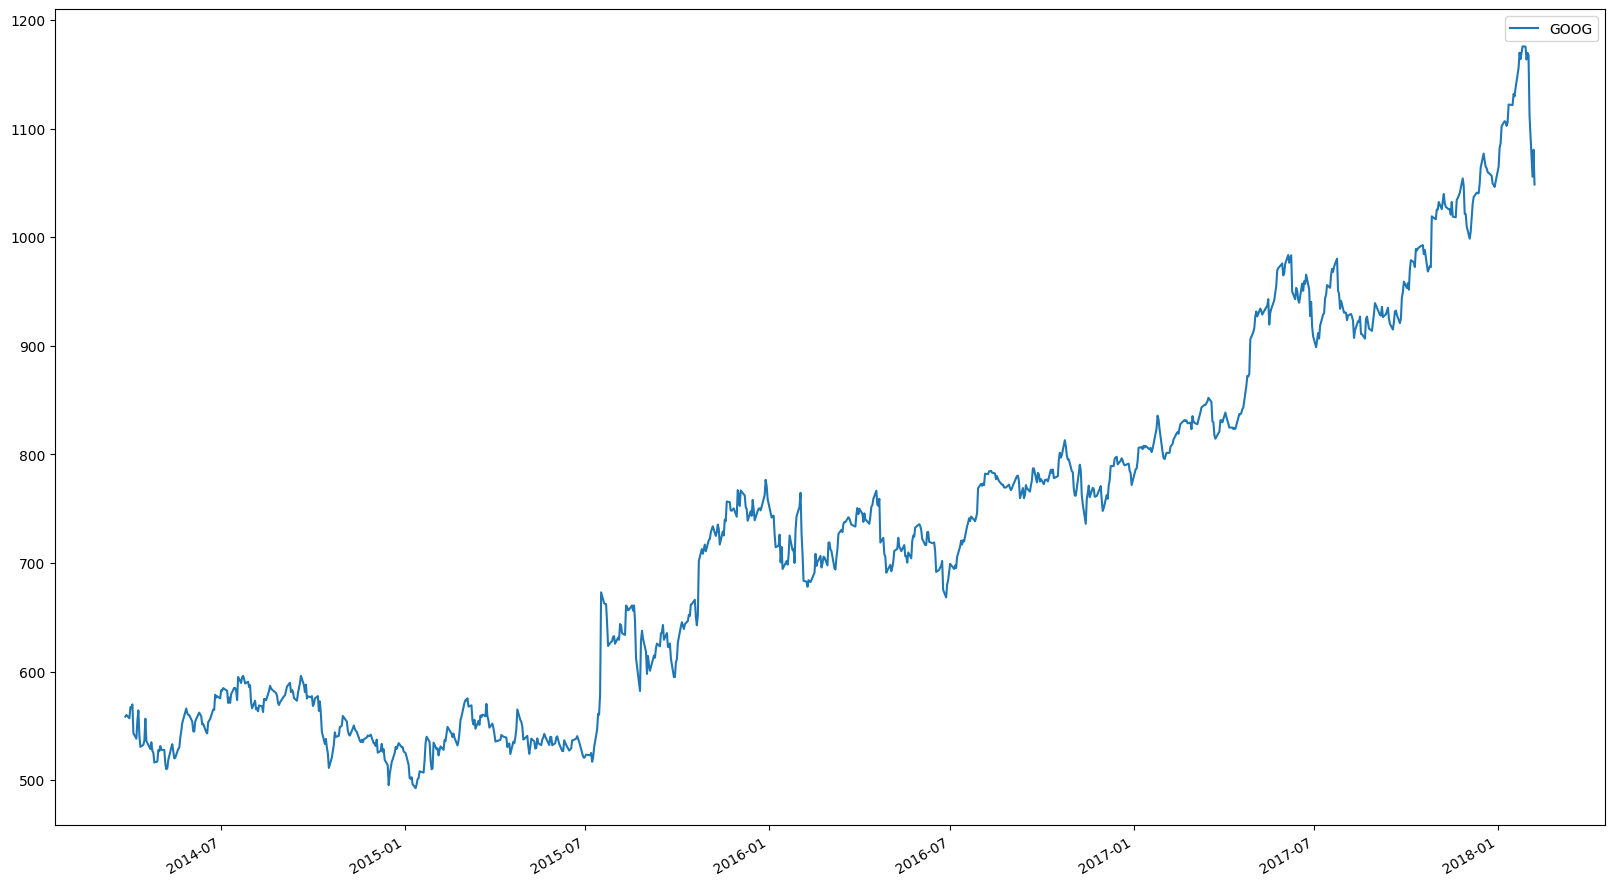

In [12]:
google.plot(figsize=(20, 12))

In [13]:
google_return = np.log(google.pct_change(1) + 1)

<Axes: >

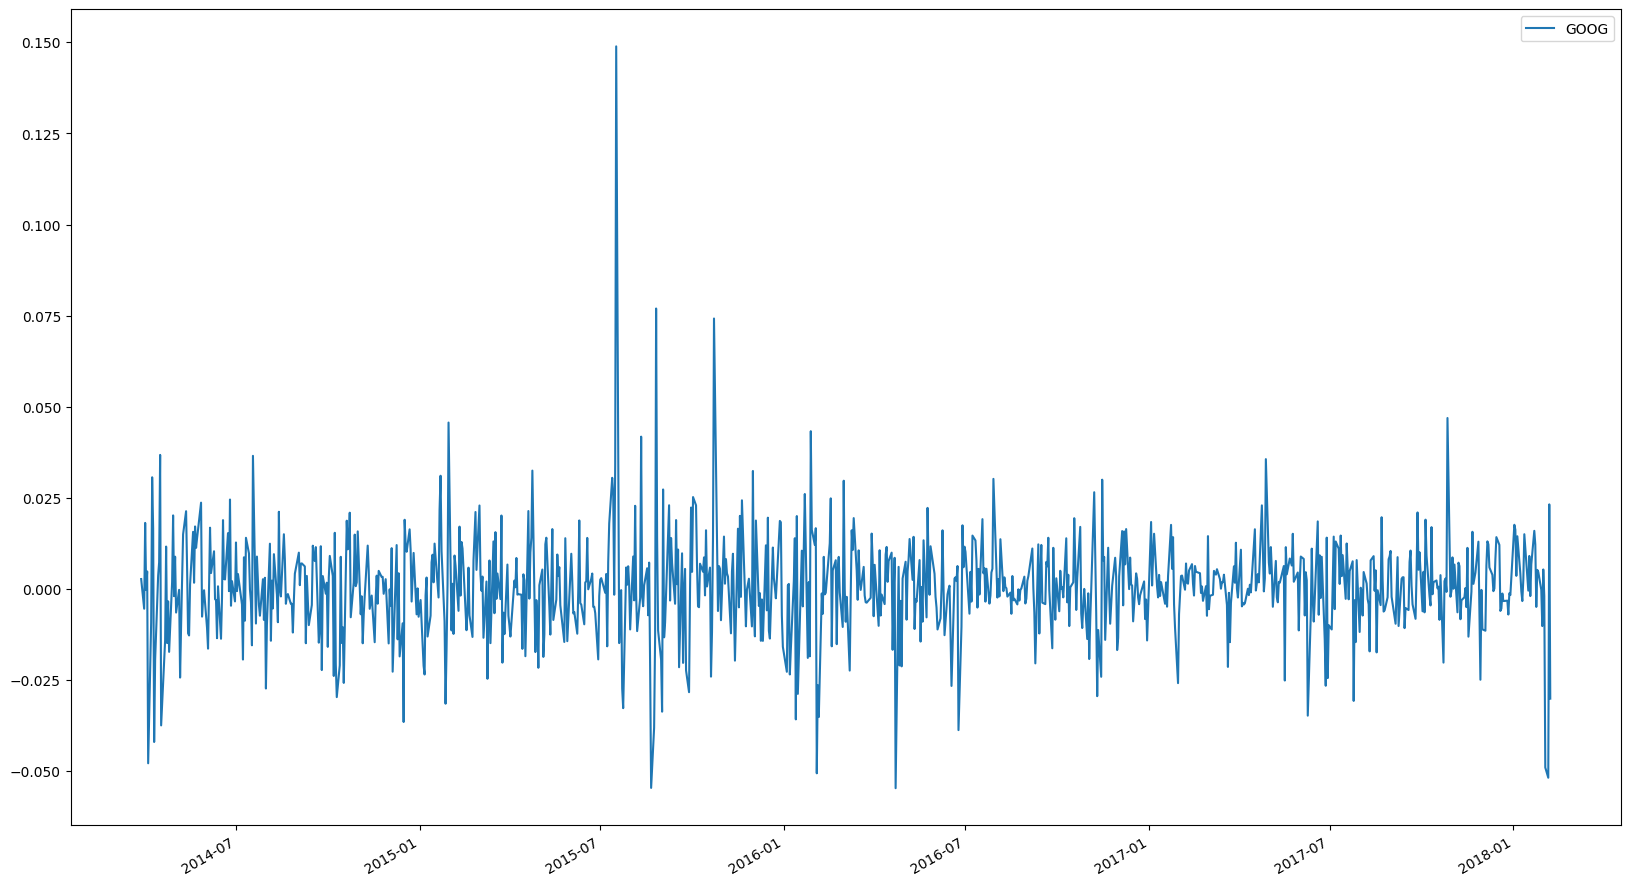

In [14]:
google_return.plot(figsize=(20, 12))

In [16]:
google["SMA-10"] = google['GOOG'].rolling(10).mean()
google.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


<Axes: >

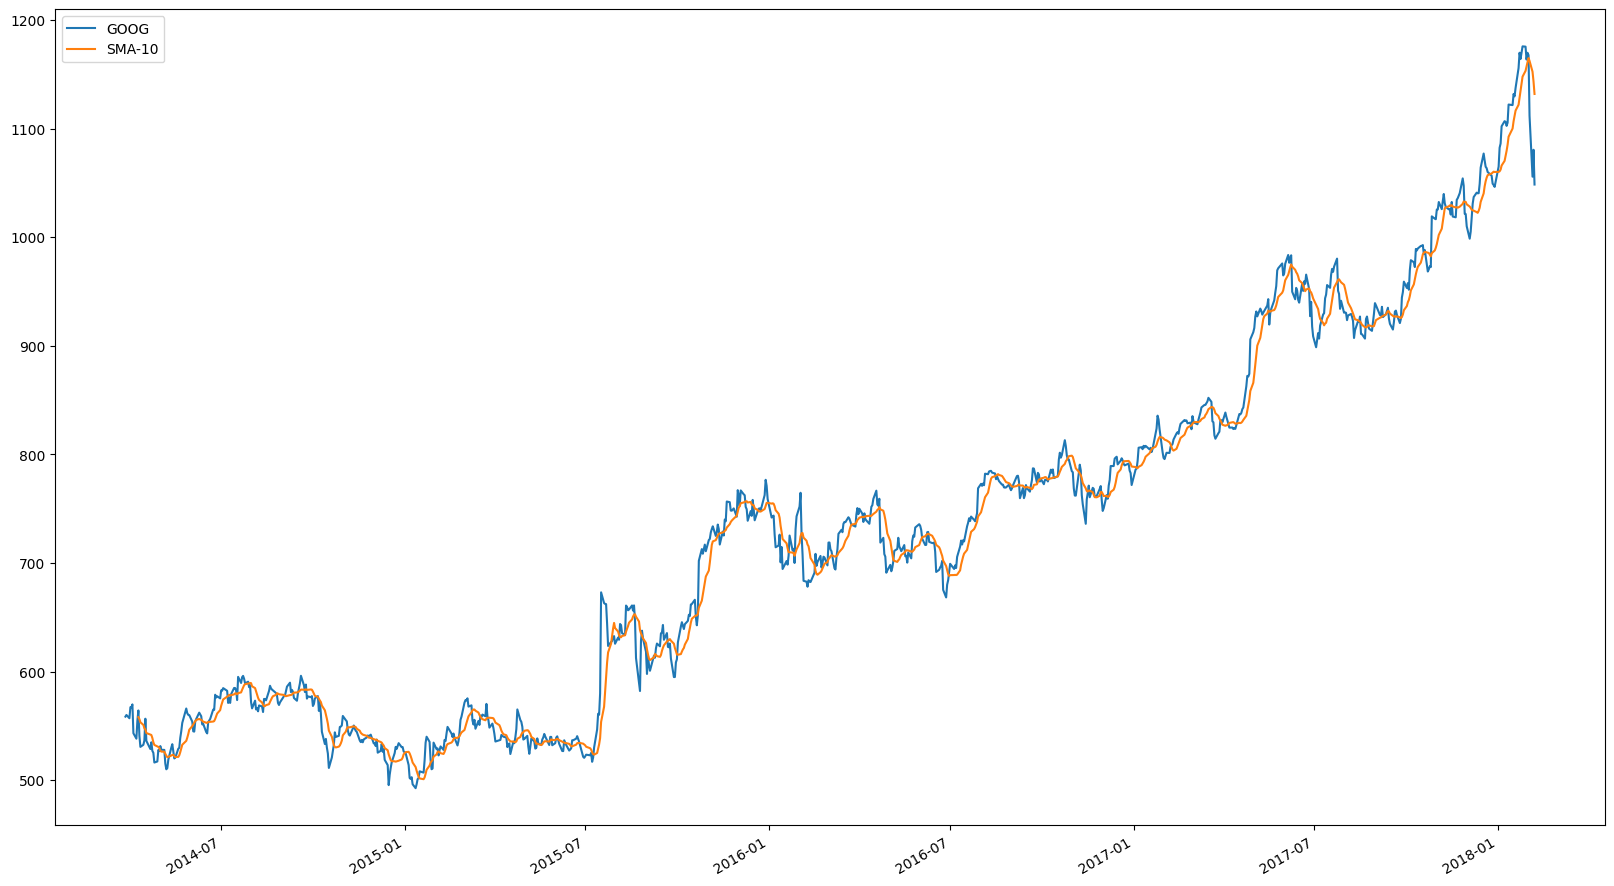

In [21]:
google.plot(figsize=(20, 12))

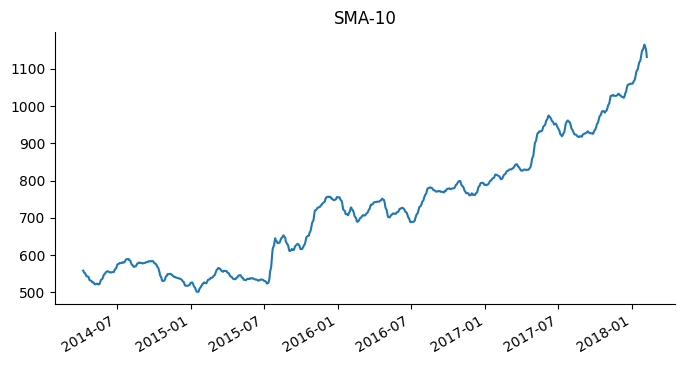

In [18]:
# @title SMA-10

from matplotlib import pyplot as plt
google['SMA-10'].plot(kind='line', figsize=(8, 4), title='SMA-10')
plt.gca().spines[['top', 'right']].set_visible(False)

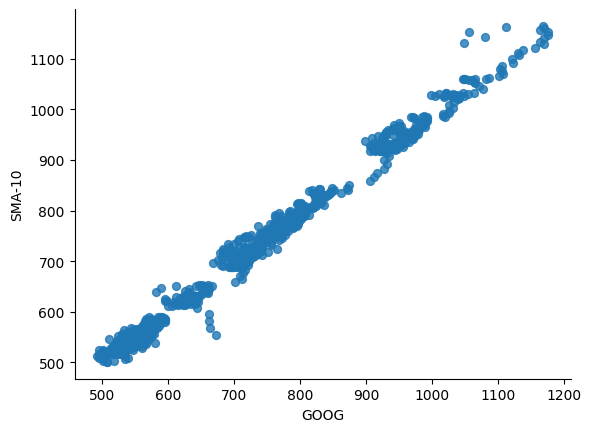

In [19]:
# @title GOOG vs SMA-10

from matplotlib import pyplot as plt
google.plot(kind='scatter', x='GOOG', y='SMA-10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
google["SMA-50"] = google['GOOG'].rolling(50).mean()
google

,GOOG,SMA-10,SMA-50
2014-03-27,558.46,NaN,NaN
2014-03-28,559.99,NaN,NaN
2014-03-31,556.97,NaN,NaN
2014-04-01,567.16,NaN,NaN
2014-04-02,567.00,NaN,NaN
...,...,...,...
2018-02-01,1167.70,1165.065,1081.2214
2018-02-02,1111.90,1162.504,1083.0918
2018-02-05,1055.80,1152.503,1083.5180
2018-02-06,1080.60,1143.566,1084.4108


<Axes: >

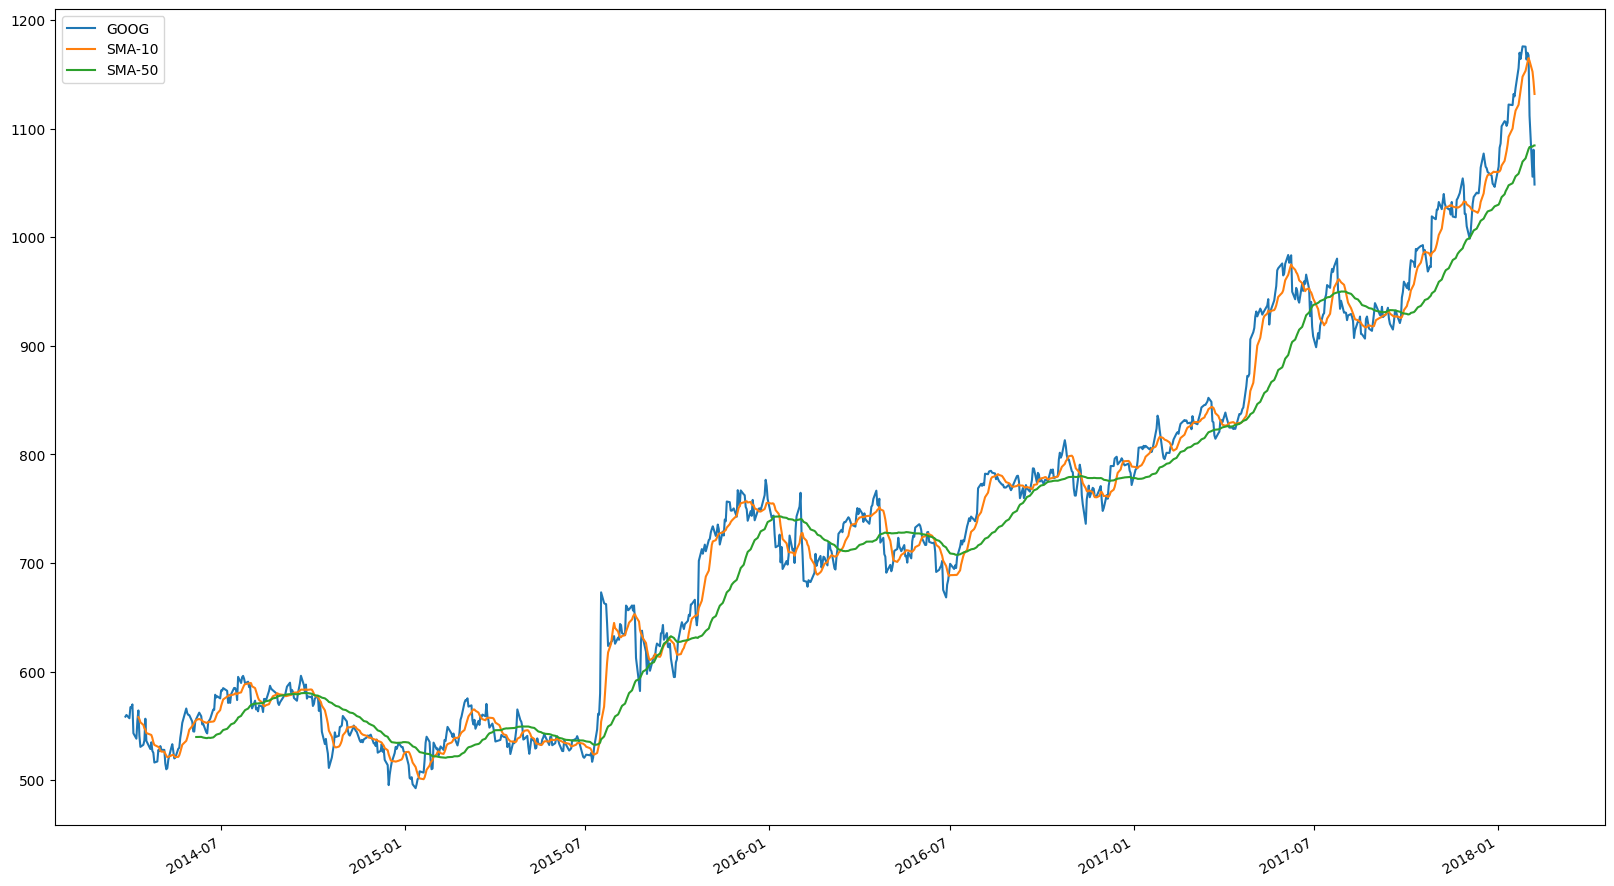

In [26]:
google.plot(figsize=(20, 12))

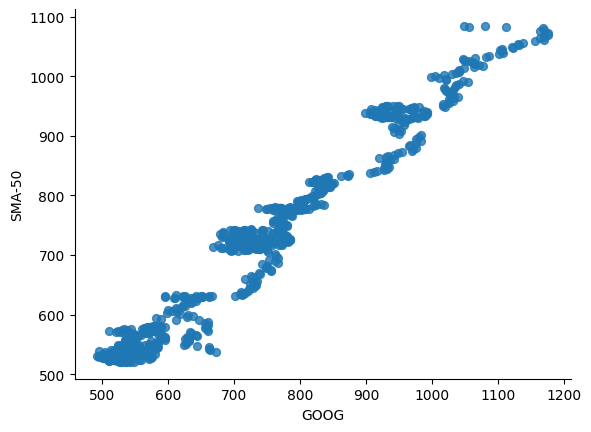

In [25]:
# @title GOOG vs SMA-50

from matplotlib import pyplot as plt
google.plot(kind='scatter', x='GOOG', y='SMA-50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
google_apple = df[["GOOG", "AAPL"]].copy().dropna()
cov = google_apple.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [30]:
cov.loc['2018-02-07']

,GOOG,AAPL
GOOG,2678.778214,49.980378
AAPL,49.980378,22.052882


In [31]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [32]:
google_apple_return = np.log(google_apple.pct_change(1) + 1)
google_apple_return

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661
...,...,...
2018-02-01,-0.001916,0.002088
2018-02-02,-0.048966,-0.044360
2018-02-05,-0.051771,-0.025302
2018-02-06,0.023218,0.040942


In [33]:
google_apple_return["GOOG-SMA-50"] = google_apple_return["GOOG"].rolling(50).mean()
google_apple_return["AAPL-SMA-50"] = google_apple_return["AAPL"].rolling(50).mean()

<Axes: >

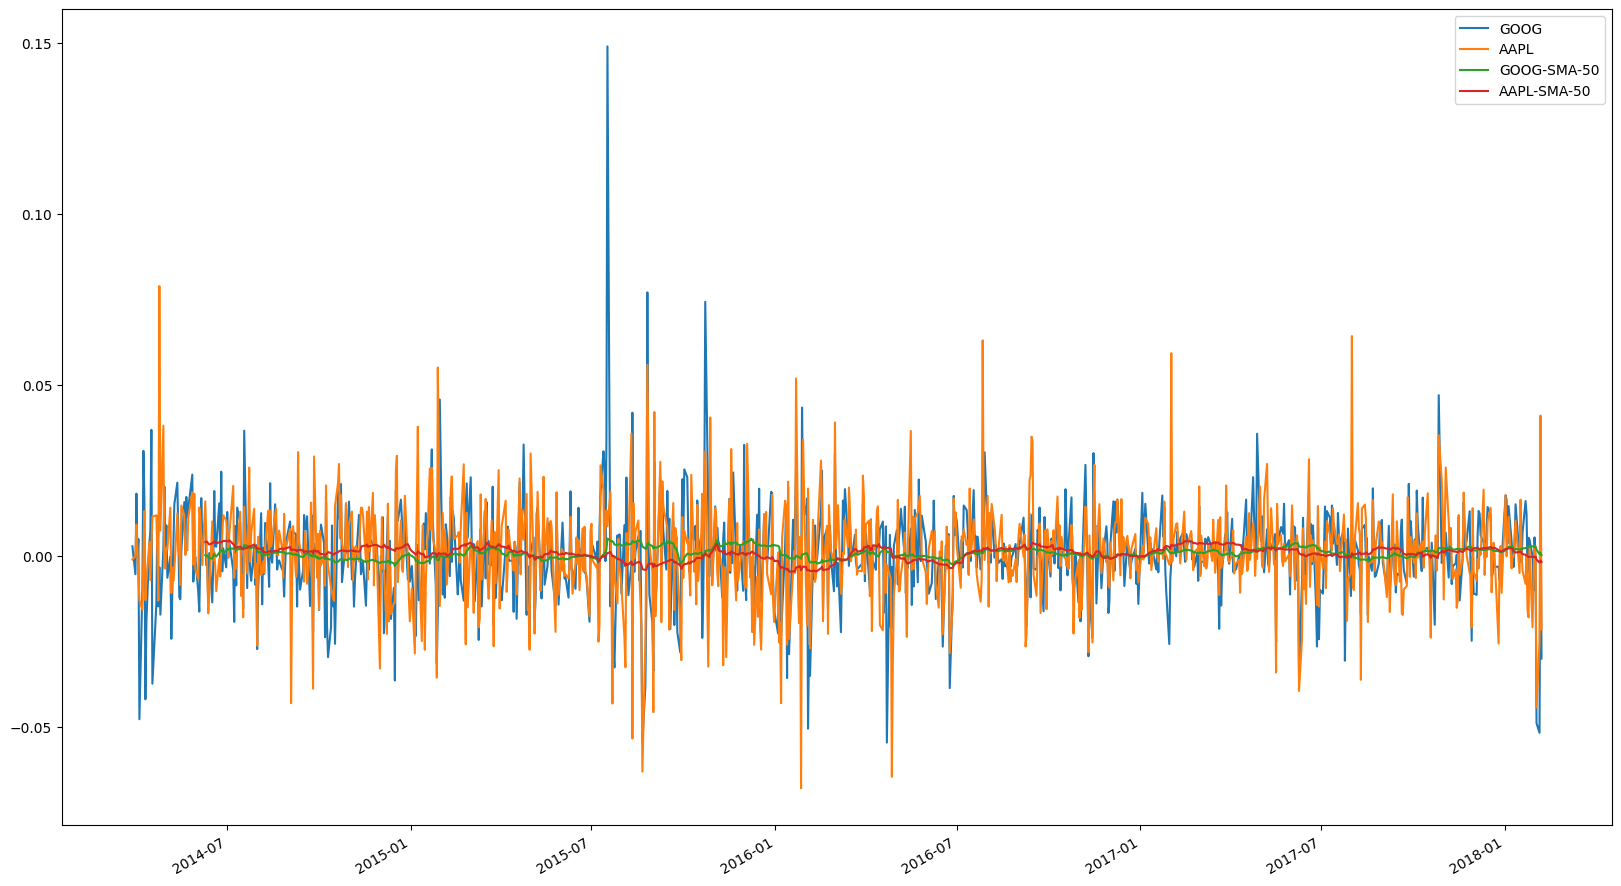

In [34]:
google_apple_return.plot(figsize=(20, 12))

<Axes: >

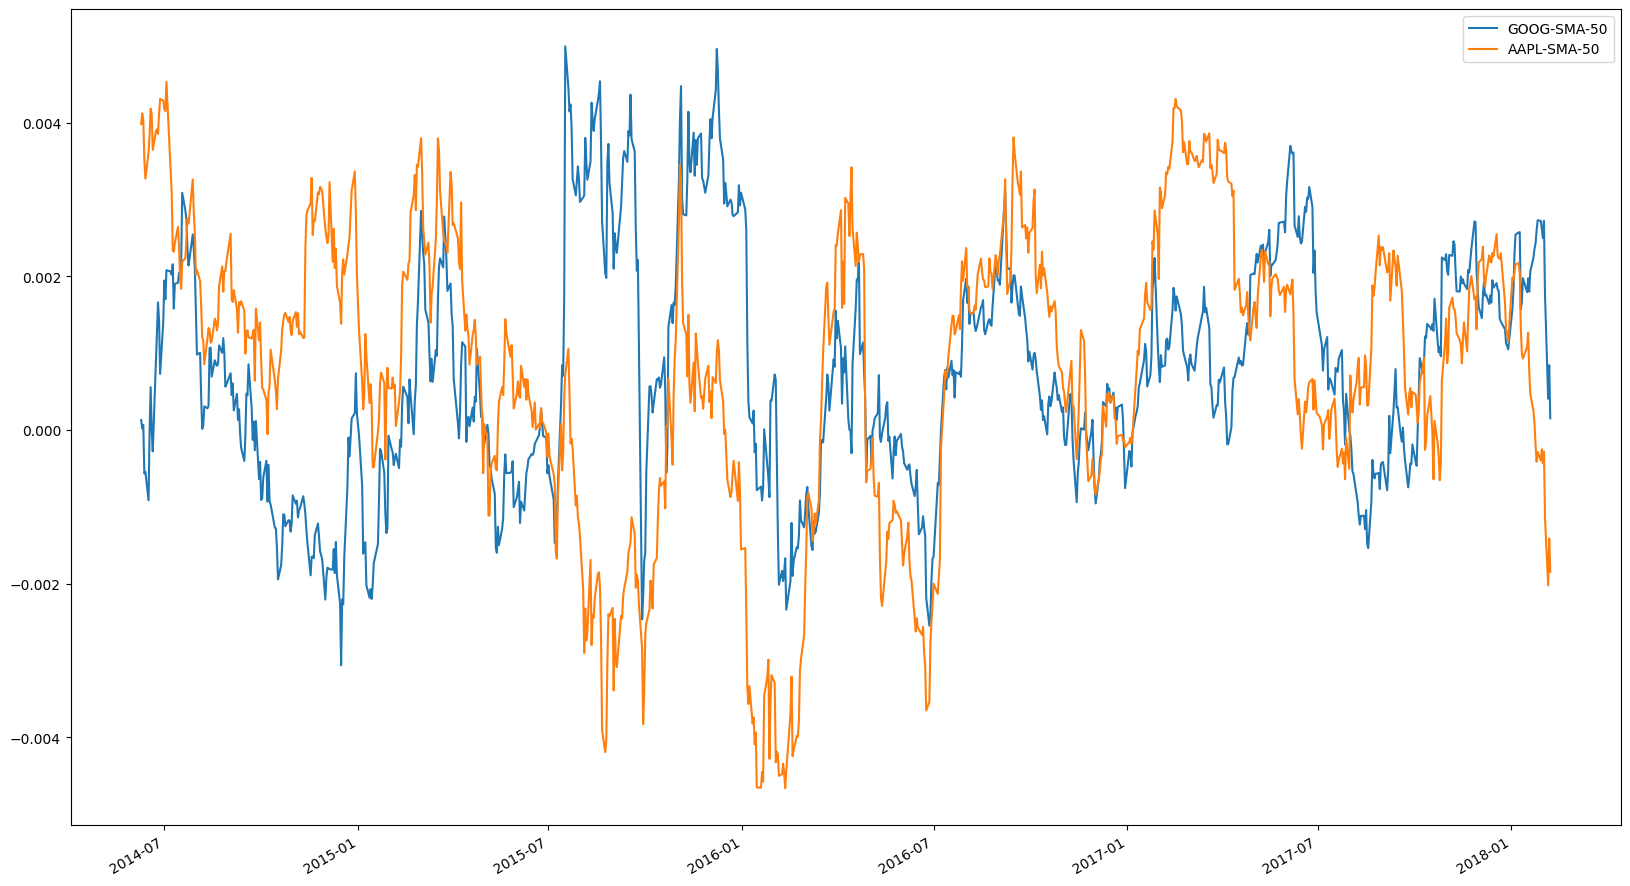

In [35]:
google_apple_return[["GOOG-SMA-50", "AAPL-SMA-50"]].plot(figsize=(20, 12))

In [39]:
cov = google_apple_return[["GOOG", "AAPL"]].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [40]:
corr = google_apple_return[["GOOG", "AAPL"]].rolling(50).corr()
corr.tail()

GOOG      AAPL
2018-02-05 AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000

from matplotlib import pyplot as plt
_df_5['GOOG'].plot(kind='hist', bins=20, title='GOOG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['AAPL'].plot(kind='hist', bins=20, title='AAPL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='GOOG', y='AAPL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GOOG'].plot(kind='line', figsize=(8, 4), title='GOOG')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['AAPL'].plot(kind='line', figsize=(8, 4), title='AAPL')
plt.gca().spines[['top', 'right']].set_visible(False)